# Ball tree - example 

- instead use the optimized code in scipy.spatial.cKDTree or sklearn.neighbors.BallTree

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
# from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

In [20]:
# create a BallTree class which will recursively subdivide the
# space into circular regions.  

class BallTree:

    # class initialization function
    def __init__(self, data):
        self.data = np.asarray(data)

        # data should be two-dimensional
        assert self.data.shape[1] == 2

        # get mean of both the columns
        self.loc = data.mean(0)
        
        self.radius = np.sqrt(np.max(np.sum((self.data - self.loc) ** 2, 1)))

        self.child1 = None
        self.child2 = None

        if len(self.data) > 1:
            # sort on the dimension with the largest spread
            largest_dim  = np.argmax(self.data.max(0) - self.data.min(0))
            i_sort       = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            split_point = 0.5 * (self.data[N // 2,     largest_dim]
                               + self.data[N // 2 - 1, largest_dim])
            print(split_point)

            # recursively create subnodes
            self.child1 = BallTree(self.data[ N // 2:])
            self.child2 = BallTree(self.data[:N // 2])

    def draw_circle(self, ax, depth=None):
        """Recursively plot a visualization of the Ball tree region"""
        if depth is None or depth == 0:
            circ = Circle(self.loc, self.radius, ec='k', fc='none')
            ax.add_patch(circ)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_circle(ax)
                self.child2.draw_circle(ax)
            elif depth > 0:
                self.child1.draw_circle(ax, depth - 1)
                self.child2.draw_circle(ax, depth - 1)


In [21]:
# Create a set of structured random points in two dimensions
np.random.seed(0)
X = np.random.random((30, 2)) * 2 - 1

X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

In [23]:
# Use our Ball Tree class to recursively divide the space
BT = BallTree(X)


-0.011840905393622037
0.08864409021099753
0.6037503153038266
0.8555329553096489
0.9252893839411522
0.9074108390156534
0.44492346639551816
0.36484005868659086
0.2348112765396
0.17296014648952351
0.26520404818781984
0.3507395213926633
0.06243324301577357
0.07066182567739643
0.029999777469000885
0.18515361600517505
0.6042815769329644
0.8016231187387208
0.9685328189000058
-0.8106895159331798
0.2739279265985078
0.43715213543510234
0.2662855896980127
-0.13875798939840278
0.04170957830983023
-0.10093342648437564
-0.012598531132457976
-0.3250637485020301
-0.21683730008730928


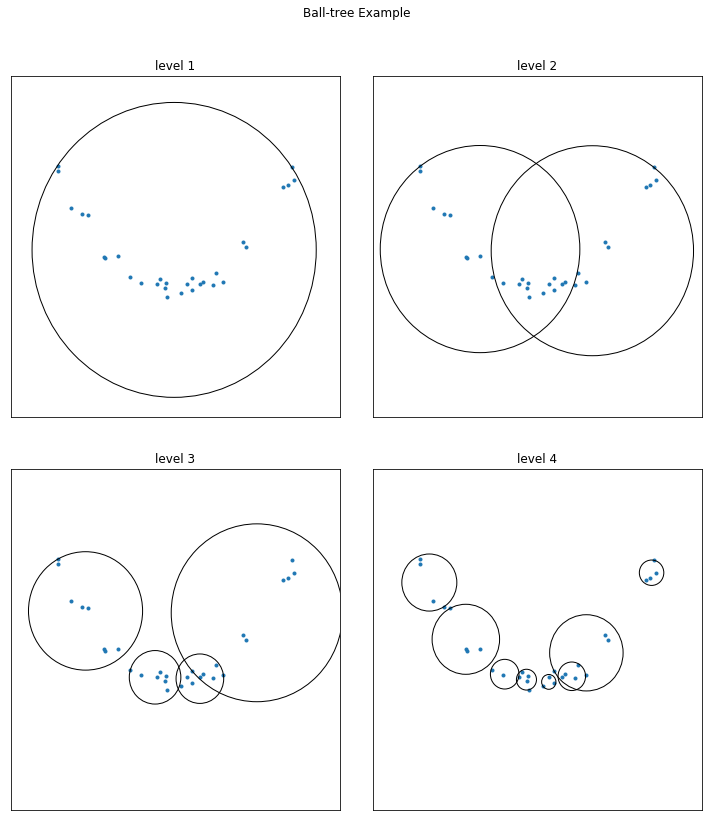

In [27]:
#------------------------------------------------------------
# Plot four different levels of the Ball tree
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.1, hspace=0.15,
                    left=0.1, right=0.9,
                    bottom=0.05, top=0.9)

for level in range(1, 5):
    ax = fig.add_subplot(2, 2, level, xticks=[], yticks=[])
    ax.scatter(X[:, 0], X[:, 1], s=9)
    BT.draw_circle(ax, depth=level - 1)

    ax.set_xlim(-1.35, 1.35)
    ax.set_ylim(-1.0, 1.7)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('Ball-tree Example')
plt.show()